# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [3]:
library(tidyverse)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [4]:
# Define the URL of the CSV file
url <- "https://github.com/rfordatascience/tidytuesday/raw/master/data/2020/2020-02-25/measles.csv"

# Define the file name where you want to save the downloaded CSV
measles <- read.csv("measles.csv")

In [5]:
measles %>% head()

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [7]:
# create the df_vacc_rates here

#First we'll filter out the schools that don't report mmr vaccination rate 
filtered_data <- measles %>%
    filter(mmr>=0)

#Then group the filtered data by state 
state_grouped <- filtered_data %>% 
    group_by(state) 

#Then summarize the processed data to provide the output 
df_vacc_rates <- state_grouped %>% 
    #sum(mmr >= 95, na.rm=TRUE)
  summarize(fraction_above_95 = sum(mmr >= 95, na.rm = TRUE) / n(), .groups = 'drop') |> 
arrange(fraction_above_95)

df_vacc_rates

state,fraction_above_95
<chr>,<dbl>
Arkansas,0.003527337
Washington,0.326592518
North Dakota,0.455555556
Maine,0.473389356
Minnesota,0.473948525
Ohio,0.491606715
Arizona,0.506404782
Oregon,0.593052109
Colorado,0.623092236


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

Arkansas

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [34]:
state_vac <- measles %>%
  filter(state == 'North Carolina', overall >= 0) %>%
  arrange(overall) %>%
  mutate(rn = row_number(), fraction_of_schools = rn / n())

state_vac %>% head()


,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,rn,fraction_of_schools
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,1,0.0004798464
2,1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,2,0.0009596929
3,1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,3,0.0014395393
4,1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,4,0.0019193858
5,1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5.0,NA,36.06362,-78.92544,5,0.0023992322
6,1761,North Carolina,2018-19,Nations Ford Elementary,NA,NA,Mecklenburg,NA,117,-1,45.3,NA,0.9,NA,35.15489,-80.90022,6,0.0028790787


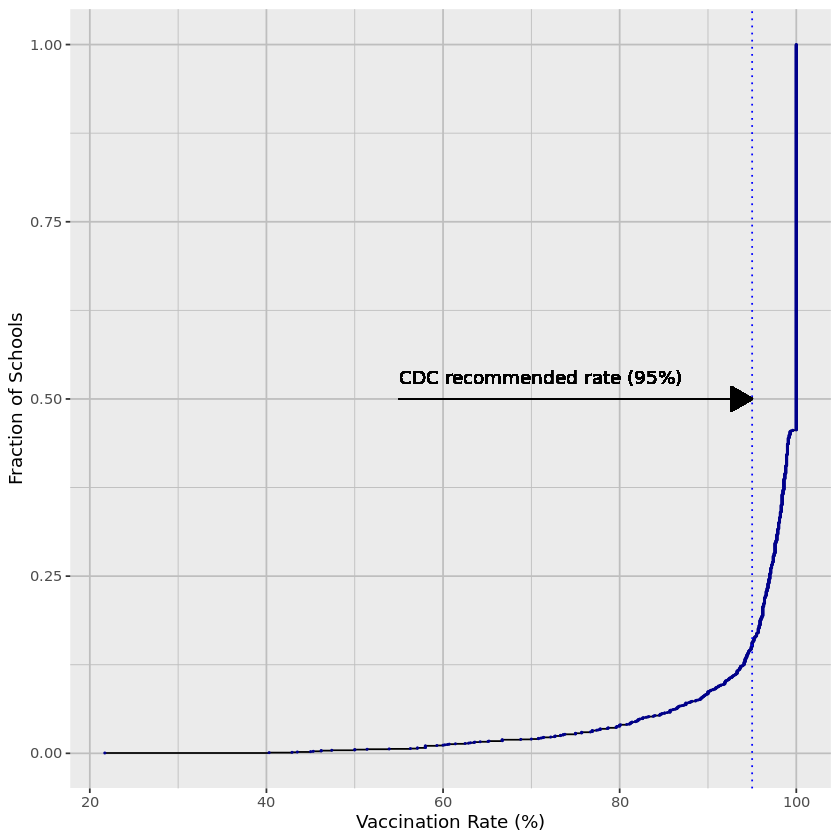

In [62]:
library(ggplot2)

ggplot(state_vac, aes(x = overall, y = fraction_of_schools)) + 
  geom_step() + 
  geom_point(size = 0.2, color = 'darkblue') + 
  geom_vline(xintercept = 95, color = 'blue', linetype = "dotted") +
  theme(panel.grid = element_line(color = "gray")) + 
  xlab("Vaccination Rate (%)") + ylab("Fraction of Schools") + 
 geom_text(aes(x = 55, y = 0.53, label = "CDC recommended rate (95%)"), hjust = 0, vjust = 0.5, color = 'black') +
  geom_segment(x = 55, xend = 95, y = 0.5, yend = 0.5, color = 'black', arrow = arrow(type = "closed", length = unit(0.2, "inches")))


(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

In [ ]:
https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [ ]:
Yes

In [50]:
median_of_overall <- median(state_vac$overall)
median_of_overall

[1] 100